# Data scraping and analysis of the recent trending status of the fast food chain Tropical Hut

snscraper has a very easy to use python wrapper than can be used to scrape tweets from a public Twitter account.

In [1]:
from tqdm import tqdm
import snscrape.modules.twitter as sntwitter
import pandas as pd
from datetime import date, timedelta
from scrape_utils import scrape_twitter

import seaborn as sns
import matplotlib.pyplot as plt

## Scraping twitter data

In [3]:
scrape_twitter(query="tropical hut", since="2022-01-01")

tropical hut since:2022-01-01 until:2022-06-20 


8032it [06:57, 19.26it/s]


## Exploration of the data and cleaning

In [2]:
df = pd.read_csv("tweets_tropical hut.csv")
df.sample(5)

,tweet_id,date,tweet,retweets,likes,quote_tweets,replies,retweeted_tweet,quoted_tweet,user_name,user_display_name,user_description,user_verified,user_location,user_created,user_followers,user_following,user_tweets_count
3222,1537293528522715136,2022-06-16 04:38:33+00:00,i really thought that tropical hut was a pharm...,0,0,0,0,NaN,NaN,leebrowni15,yodabrowni,Tzuyu • Yongbok\n\nhe/they\n\ncc: curiouscat.m...,False,stay st.,2021-07-30 14:54:09+00:00,423,842,12015
5746,1536458657491083264,2022-06-13 21:21:04+00:00,"@evenotaries Ay, there's a reason why the lump...",0,5,0,1,NaN,NaN,eufems,Eufy Fight! #MABUHAYangFrontliners,Karaniwang mamamayan ∙ May hilig sa kasaysayan...,False,"Quezon City, National Capital",2009-05-18 13:51:14+00:00,2245,1184,66802
7376,1532128013491441664,2022-06-01 22:32:38+00:00,Went to the tropical hut and got some provisio...,0,0,0,0,NaN,NaN,SchoonoverHM,Hiram,"I am an exotic pet owning, gamer, who on occas...",False,NaN,2022-01-13 02:42:59+00:00,3,43,1015
2470,1537444021521420292,2022-06-16 14:36:33+00:00,Want ko ng tropical hut ah... Kaso alaws sa et...,0,0,0,0,NaN,NaN,laiixxnr,lia I 엘라이사 💙,"ey | 15,035,773 💖",False,none of your business,2020-03-18 21:23:12+00:00,47,90,2551
1976,1537664067665817600,2022-06-17 05:10:56+00:00,Hahahaha... Dito ako madalas kumain na branch ...,0,0,0,0,NaN,https://twitter.com/tammydavid/status/15376577...,PPopBLFan,BGYO / VXON cuties♥️,BGYO / VXON,False,Republic of the Philippines,2013-09-29 23:42:11+00:00,113,904,7640


In [3]:
# Convert the date column into datetime64 format and adjust for Manila's timezone
df['date']=pd.to_datetime(df['date'], yearfirst=True).dt.tz_convert('Asia/Manila')
df['user_created']=pd.to_datetime(df['user_created'], yearfirst=True).dt.tz_convert('Asia/Manila')
df.dtypes

tweet_id                                   int64
date                 datetime64[ns, Asia/Manila]
tweet                                     object
retweets                                   int64
likes                                      int64
quote_tweets                               int64
replies                                    int64
retweeted_tweet                          float64
quoted_tweet                              object
user_name                                 object
user_display_name                         object
user_description                          object
user_verified                               bool
user_location                             object
user_created         datetime64[ns, Asia/Manila]
user_followers                             int64
user_following                             int64
user_tweets_count                          int64
dtype: object

In [4]:
searchfor = ['Tropical Hut', 'tropical hut', 'TropicalHut']
df = df[df.tweet.str.contains('|'.join(searchfor))]

In [5]:
# Statistical analysis of the data
df.describe()

,tweet_id,retweets,likes,quote_tweets,replies,retweeted_tweet,user_followers,user_following,user_tweets_count
count,7.347000e+03,7347.000000,7347.000000,7347.000000,7347.000000,0.0,7.347000e+03,7347.000000,7347.000000
mean,1.535341e+18,2.965156,35.008030,1.722744,0.826596,NaN,2.976653e+03,696.654281,28629.057983
std,8.179518e+15,63.838321,718.668213,52.664610,8.465293,NaN,1.005566e+05,1115.552586,48453.389291
min,1.477580e+18,0.000000,0.000000,0.000000,0.000000,NaN,0.000000e+00,0.000000,1.000000
25%,1.536382e+18,0.000000,0.000000,0.000000,0.000000,NaN,1.200000e+02,196.000000,4061.000000
50%,1.537101e+18,0.000000,1.000000,0.000000,0.000000,NaN,3.230000e+02,401.000000,13783.000000
75%,1.537672e+18,0.000000,2.000000,0.000000,1.000000,NaN,8.330000e+02,781.000000,34267.000000
max,1.538431e+18,3526.000000,35921.000000,3596.000000,530.000000,NaN,8.510703e+06,33678.000000,984030.000000


## Trend history

We scraped tweets from Jan 01, 2022 to Jun 19, 2022. We can see that the trend started  on Jun 12, 2022 and peaked on Jun 16. Interestingly, there is a small peak during March.

<AxesSubplot:xlabel='date', ylabel='tweet_id'>

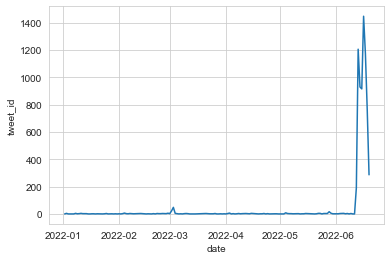

In [6]:
sns.set_style("whitegrid")
df_count = df['tweet_id'].groupby(by=df['date'].dt.date).count().sort_values(ascending=False)
sns.lineplot(data=df_count)

In [133]:
df_count.sort_values(ascending=False).head(10)

date
2022-06-16    1446
2022-06-13    1205
2022-06-17    1173
2022-06-14     929
2022-06-15     915
2022-06-18     765
2022-06-19     287
2022-06-12     192
2022-03-03      49
2022-03-02      23
Name: tweet_id, dtype: int64

## Top Tweets
Below we filtered the data to include only tweets that were posted on June 12, 2022. We then sorted by likes, and we can see the originating tweet of the trend

In [7]:
df_jun12 = df[['tweet', 'user_name', 'likes', 'retweets']][(df.date > '2022-06-12') & (df.date < '2022-06-13')].sort_values('likes', ascending=False)
df_jun12.head(10)

,tweet,user_name,likes,retweets
7331,"Tropical Hut in Escolta, ako lang ang customer...",dumidyeypee,34312,3526
7330,I remember eating out with my family in Tropic...,dumidyeypee,1666,47
7306,@dumidyeypee May Tropical Hut sa Makati. My of...,lanaroadzz,1256,34
7201,Tropical Hut if you don't mind is owned by Mer...,Shirley47569882,861,74
7167,Not gonna lie. I'm surprise Tropical Hut is tr...,SepiaMetanoia,447,58
7230,How Tropical Hut serves so much affordable and...,__Miggyyy,389,43
7297,@dumidyeypee Nakakalungkot ang ambience sa Tro...,_stephsun,385,13
7322,@dumidyeypee who owns tropical hut? kailangan ...,krephel1218,375,1
7288,@_thepaulorubio @MrlnSngco @krephel1218 @dumid...,_picassomnlpex,305,5
7273,"y'know, Tropical Hut has the potential to be a...",kenzopito,251,34


In [135]:
for i in range(10):
    print(df_jun12.iloc[i].tweet)

Tropical Hut in Escolta, ako lang ang customer nila. https://t.co/Wl8VcuWT6c
I remember eating out with my family in Tropical Hut along Baymart Plaza in Lower Bicutan. Really competing sila with the likes of Jollibee and Chowking (hindi pa binili ni Jollibee era).
@dumidyeypee May Tropical Hut sa Makati. My officemates and I order breakfast. Masarap na, sulit pa! Ham and mushroom omelette, garlic rice or toasted bread, brewed coffee and pineapple juice for 99pesos lang!
Tropical Hut if you don't mind is owned by Mercury Drugstore from Que Family 🙂kaya food ay Healthy na nakakabusog!
Not gonna lie. I'm surprise Tropical Hut is trending right now in the Philippines.

Glad most Filipinos are fondly remember this restaurant. And this come from someone who rarely eats here for year. #TropicalHut https://t.co/PLWQ14BBTn
How Tropical Hut serves so much affordable and better quality food than mainstream fastfood chains like Jollibee is just amazing. https://t.co/WGZ3OpPlnu
@dumidyeypee Nakakal

Below we focused on Jun 19. The peak of the trend. The 3rd and 4th highest likes here appear to be from their social media account.

In [8]:
df_jun16 = df[['tweet', 'user_name', 'likes', 'retweets']][(df.date > '2022-06-16') & (df.date < '2022-06-17')].sort_values('likes', ascending=False)
df_jun16.head(10)

,tweet,user_name,likes,retweets
3206,We jumped into the trend! \nOrdered a lot from...,MINlRM,24774,1650
2662,Tropical Hut getting increased sales is why I ...,prodeeboy,5056,573
2776,#TropicalHut #THHamburger #SarapNaBabalikbalik...,THHamburger,3453,597
2780,"@dumidyeypee Maraming salamat, Tropical Hut lo...",THHamburger,1340,106
2997,Update: Saw this Tropical Hut ad from my lolo'...,LiaSanMateo,537,49
3318,"Again, try tropical hut. Sabi ng mga staff dit...",yeol_mistress,442,46
3033,Kahapon ko pa nababasa ang tweets tungkol sa T...,DocHappy95,417,16
3044,Nakapag-Tropical Hut na ba ang lahat https://t...,SofiaMonica_,128,2
2578,Tropical Hut for tonight's dinner 🍍🍍\nSobrang ...,jmyosures,101,3
3042,Di ko na po sure yung price nila kasi sa grab ...,MINlRM,98,2


In [137]:
for i in range(10):
    print(df_jun16.iloc[i].tweet)

We jumped into the trend! 
Ordered a lot from Tropical Hut.
I grew up with TH because of my aunts where they work and they always tream me there.

I ordered the BB - Big shot breakfast, for only 190 (?) Rice, ham, mushroom &amp; cheese omelette, chicken lumpia &amp; burger steak! https://t.co/SHWTbruviR
Tropical Hut getting increased sales is why I believe Twitter is a different kind of echo chamber. It has the capacity to affect the real world.
#TropicalHut #THHamburger #SarapNaBabalikbalikan https://t.co/S02aGAVVYc
@dumidyeypee Maraming salamat, Tropical Hut lovers ❤️ for the heartwarming words of appreciation! 
We value your patronage. See you at #TropicalHut!
#SarapNaBabalikbalikan
Update: Saw this Tropical Hut ad from my lolo's magazine collection. This Panorama issue was published in 1977—45 years ago. 😳 Guess it really is the OG. https://t.co/RURrlz8R5y
Again, try tropical hut. Sabi ng mga staff dito, ang dami namin customers mam. Trending kami sa twitter. Saya nila. https://t.c

Here are the top tweets from that small bump during March

In [9]:
df_mar2 = df[['tweet', 'user_name', 'likes', 'retweets']][(df.date > '2022-03-02') & (df.date < '2022-03-04')].sort_values('likes', ascending=False)
df_mar2.head(10)

,tweet,user_name,likes,retweets
7829,Ako lang ba or may iba rin na ang gold standar...,oslecjunior,1245,39
7760,These just came in. \n\nHappiness in a photo.\...,oslecjunior,141,2
7820,@oslecjunior DEFINITELY Tropical Hut tops them...,burgoscm333,20,0
7793,"@oslecjunior Yes. For me, yung pickle sa burge...",MagnoliaZoleta,20,0
7777,"@FhqJackie Yes. Queens, Shop-Rite, Tropical Hu...",enriquietto1,15,2
7815,@oslecjunior Ranchero Burger FTW!!! I always l...,otepmed1,11,0
7765,@enriquietto1 @FhqJackie Tropical Hut supermar...,DolorNolet,7,0
7827,"@oslecjunior Uy, namiss ko yan. Favorite ko ri...",docemdy,6,0
7828,"@oslecjunior Grabe, iba ang sarap ng Tropical ...",janeyan_23,4,0
7823,@oslecjunior Masarap ang Bistek Tagalog ng Tro...,prukotooch,4,0


In [139]:
for i in range(10):
    print(df_mar2.iloc[i].tweet)

Ako lang ba or may iba rin na ang gold standard sa burger ay Tropical Hut hamburgers? Please tell me I’m not alone. 😅😬

#TitoOfManila
These just came in. 

Happiness in a photo.

#TropicalHut https://t.co/AtjZtZj5Du
@oslecjunior DEFINITELY Tropical Hut tops them all ! burger  that's real meaty, big fried chicken that's not too salty, creamy potato salad, bistek tagalog that's so yummy,  sarap tuna and chicken sandwich  and much more...and polite staff and   fast service too.
@oslecjunior Yes. For me, yung pickle sa burger nila yung nagdala.🥰 Yung ilalapit mo pa lang sa bibig mo, you’d smell the unique smell of a true burger. Huling kain ko sa Tropical Hut sa may tabi ng Crispa pa yon was &gt; 20yrs ago pa but I won’t forget the taste. Walang sinabi mga burgers now.
@FhqJackie Yes. Queens, Shop-Rite, Tropical Hut groceries. Metro Manila at that time was not yet congested with ppl, vehicles and pollution.
@oslecjunior Ranchero Burger FTW!!! I always look forward uwian kami ng erpat ko ny

I looked for the most followed accounts in the trends. Most of these are news organizations, some celebrities, and corporate brands.

In [10]:
users = df[['user_name', 'user_display_name', 'user_followers', 'user_following', 'user_created']].sort_values('user_followers', ascending=False).drop_duplicates('user_name')
users.head(15)

,user_name,user_display_name,user_followers,user_following,user_created
5898,ABSCBNNews,ABS-CBN News,8510703,1063,2008-08-16 18:09:33+08:00
4777,manilabulletin,Manila Bulletin News,1060174,213,2008-07-10 15:55:26+08:00
5005,yaelyraz,Yael Yrastorza Yuzon,387885,1814,2009-04-23 20:05:33+08:00
1992,j0w_sef,(Daddhie) Yow,228362,984,2011-10-17 11:11:51+08:00
5518,interaksyon,Interaksyon,213354,106,2011-01-25 19:24:31+08:00
5074,Spotdotph,SPOT.ph,151115,972,2009-03-31 22:10:17+08:00
5176,grabph,Grab Philippines,147691,13041,2013-05-15 02:48:27+08:00
5581,dearscarjames,James Banaag,114554,985,2009-04-19 20:21:31+08:00
7314,ianabrhm,BenBen | #LetLeniLead #LabanLeni2022,90445,4768,2016-08-24 09:14:30+08:00
433,ushmakes,follow back ⬤,70415,33678,2010-12-23 22:09:41+08:00


In [11]:
top_users = users['user_name'].head(10).to_list()
df[df['user_name'].isin(top_users)].sort_values('user_followers', ascending=False)[['tweet', 'user_name', 'likes', 'retweets']].head(10)

,tweet,user_name,likes,retweets
5898,"Why ‘Tropical Hut’ trended on Twitter, inspiri...",ABSCBNNews,1098,179
4777,"Last June 12, 124th Philippine Independence Da...",manilabulletin,31,9
5005,OPM Burger #TropicalHut https://t.co/W3i1JjAuv...,yaelyraz,94,10
1992,gave in to the trend. 1st time to try tropical...,j0w_sef,75,0
5904,ano masarap itry sa grab na tropical hut?,j0w_sef,25,0
22,Most of Tropical Hut's stores are located in M...,interaksyon,3,2
5213,OPERATING SINCE 1965\n\nThe name “Tropical Hut...,interaksyon,168,40
637,What are your fond memories of Tropical Hut? 🍔...,interaksyon,14,4
818,‘WE VALUE YOUR PATRONAGE.’\n\nTropical Hut Ham...,interaksyon,65,8
2225,Most of Tropical Hut's stores are located in M...,interaksyon,3,2


## Users' account age

Whenever there's a trend, it is interesting to look at the age of accounts. It looks like there are a lot of accounts from 2010. The second peak however are very new accounts.

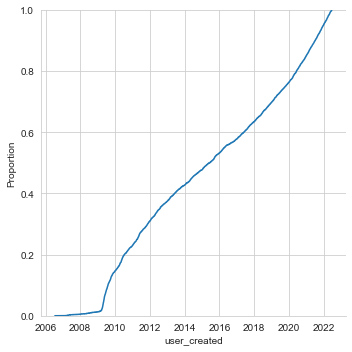

In [19]:
accts = df.drop_duplicates('user_name')[['user_name', 'user_display_name', 'user_followers', 'user_following', 'user_tweets_count', 'user_created']]
sns.displot(accts, x='user_created', kind="ecdf")

In [25]:
new_accts = accts[accts['user_created'] > '2022-01-01']
sns.displot(new_accts, x='user_followers', y='user_tweets_count', binwidth=(2, .5))

In [170]:
top_new_users = users[users.user_created > '2022-01-01']['user_name'].head(15).to_list()
top_new_user_tweets = df[df['user_name'].isin(top_new_users)].sort_values('user_followers', ascending=False)
top_new_user_tweets.head(10)

,tweet_id,date,tweet,retweets,likes,quote_tweets,replies,retweeted_tweet,quoted_tweet,user_name,user_display_name,user_description,user_verified,user_location,user_created,user_followers,user_following,user_tweets_count
7561,1518186193028096001,2022-04-24 19:12:49+08:00,tropical hut cheese burger &gt;&gt;&gt;&gt;,0,0,0,0,NaN,NaN,gojologyy,春姫 ♡s rei | semi ia,#BARBATOS : 私荷全て任せてください . . . 💭,False,"i. kaede haruhi or levi\n☆ minor (14), any pro...",2022-04-05 22:34:02+08:00,7442,6433,31571
2780,1537395573841874944,2022-06-16 19:24:02+08:00,"@dumidyeypee Maraming salamat, Tropical Hut lo...",106,1340,23,30,NaN,NaN,THHamburger,Tropical Hut Hamburger,NaN,False,NaN,2022-06-16 15:47:52+08:00,2587,0,12
2776,1537396470672142337,2022-06-16 19:27:36+08:00,#TropicalHut #THHamburger #SarapNaBabalikbalik...,597,3453,261,82,NaN,NaN,THHamburger,Tropical Hut Hamburger,NaN,False,NaN,2022-06-16 15:47:52+08:00,2587,0,12
792,1537993598482157569,2022-06-18 11:00:23+08:00,@oslecjunior Tropical Hut loves you too JR! ❤️...,1,39,1,0,NaN,NaN,THHamburger,Tropical Hut Hamburger,NaN,False,NaN,2022-06-16 15:47:52+08:00,2587,0,12
819,1537989500114468864,2022-06-18 10:44:05+08:00,@marytranscona Thank you very much @marytransc...,0,3,0,0,NaN,NaN,THHamburger,Tropical Hut Hamburger,NaN,False,NaN,2022-06-16 15:47:52+08:00,2587,0,12
1854,1537691864748666880,2022-06-17 15:01:24+08:00,@akosibeaxoxx Thank you very much! We value yo...,5,95,1,1,NaN,NaN,THHamburger,Tropical Hut Hamburger,NaN,False,NaN,2022-06-16 15:47:52+08:00,2587,0,12
1918,1537679203155705857,2022-06-17 14:11:05+08:00,Tropical Hut date cutie ✨,0,11,0,0,NaN,NaN,blacknwhite0012,Poy 🎀,CPA | Books | Geography | Astronomy | @paulpi...,False,Metro Manila,2022-01-31 19:14:57+08:00,2087,432,505
5467,1536562096464228353,2022-06-14 12:12:06+08:00,@supernegatrona @WomanityMP mukhang walang gan...,0,2,0,1,NaN,NaN,GManicurist,BaklangManicurista2.0,Yes! I'm Back Bitches! \nINDIE Film Producer,False,NaN,2022-02-19 02:13:24+08:00,1800,400,6515
4691,1536930861102137349,2022-06-15 12:37:26+08:00,Hmmm. I dont know how to feel about this. \nTr...,0,4,0,2,NaN,https://twitter.com/IanGalliguez/status/153689...,GManicurist,BaklangManicurista2.0,Yes! I'm Back Bitches! \nINDIE Film Producer,False,NaN,2022-02-19 02:13:24+08:00,1800,400,6515
6906,1536118223674163200,2022-06-13 06:48:18+08:00,Trending ang Tropical Hut. I dunno why. All I ...,1,16,0,2,NaN,NaN,BenjPagt,Benj 🔴🟢,Registered nurse • Web content writer • Street...,False,NaN,2022-05-07 08:58:40+08:00,1517,1181,1292


In [171]:
for i in range(10):
    print(top_new_user_tweets.iloc[i].tweet)

tropical hut cheese burger &gt;&gt;&gt;&gt;
@dumidyeypee Maraming salamat, Tropical Hut lovers ❤️ for the heartwarming words of appreciation! 
We value your patronage. See you at #TropicalHut!
#SarapNaBabalikbalikan
#TropicalHut #THHamburger #SarapNaBabalikbalikan https://t.co/S02aGAVVYc
@oslecjunior Tropical Hut loves you too JR! ❤️❤️❤️ Maraming salamat sa inyong pagtangkilik. We hope to see you in our stores again soon!
@marytranscona Thank you very much @marytranscona ! We value your patronage! See you at Tropical Hut!
@akosibeaxoxx Thank you very much! We value your patronage! See you at Tropical Hut!
Tropical Hut date cutie ✨
@supernegatrona @WomanityMP mukhang walang ganap ang mga tibak kaya pati kwentuhang lafang ng tropical hut--pinatos!
Hmmm. I dont know how to feel about this. 
Tropical Hut owners are BBM supporters? yikes! https://t.co/lRKCLydiCr
Trending ang Tropical Hut. I dunno why. All I know is underrated sya and it deserves lots and lots of success. BTW, I collect prim